# IMPORTS

In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import statsmodels as stsm
import statsmodels.api as sm
import numpy as np
import sklearn as skl
from pycaret.classification import *
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,confusion_matrix,mean_squared_error, r2_score # Para Cálculo de R2 e RMSE
from sklearn.model_selection import train_test_split #modelagem >:)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VERIFICANDO O CSV WINE QUALITY

In [13]:
df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
#Corrigindo espaço entre os nomes das colunas (afeta em sua chamada nas funções)
colunas_at = df.columns

colunas_novas = [col.strip().lower().replace(' ', '_').replace('.','_') for col in colunas_at]

df.columns = colunas_novas

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## EDA E PREPARAÇÃO DO DF

In [15]:
print('Informações úteis')
df.info()

Informações úteis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
print('Estatísiticas descritivas:')
df.describe()

Estatísiticas descritivas:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
print("Tem valores ausentes?")
df.isnull().sum()

Tem valores ausentes?


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

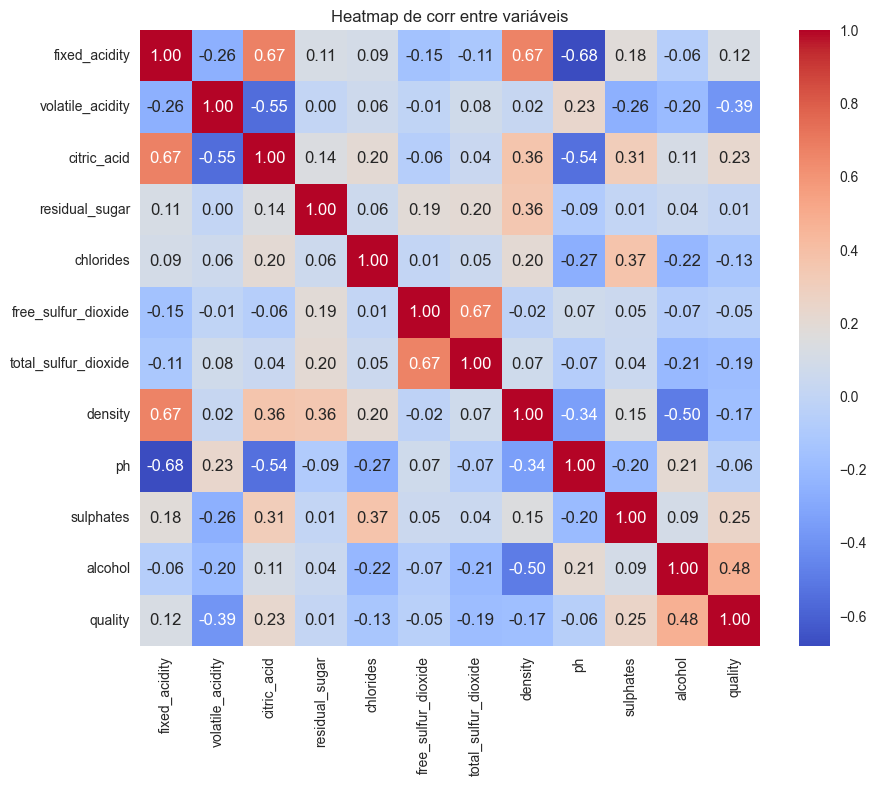

In [18]:
#Entendendo a correlação do df.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de corr entre variáveis')
plt.show()

A análise exploratória inicial (EDA) cumpriu os requisitos de inspeção de esquema, tratamento de ausências e visualização de relações, comprovando a qualidade dos dados e definindo a base para a modelagem.

### Principais Constatações e Tratamento de Inconsistências

1.  **Ausências e Tipos:** O `df.info()` confirmou a inexistência de valores ausentes (`NaN`), e todas as variáveis são do tipo numérico (`float64` ou `int64`), eliminando a necessidade de imputação ou codificação inicial.
2.  **Correlação:** O *Heatmap* de correlação revelou que as variáveis mais correlacionadas positivamente com o alvo (`quality`) são **alcohol** (+0.48) e **sulphates** (+0.25). Por outro lado, **volatile_acidity** (-0.39) e **fixed_acidity** (-0.08) apresentam correlação negativa.
3.  **Outliers e Vieses:** Os *Boxplots* indicam a presença de diversos *outliers* em variáveis como `residual_sugar`, `chlorides` e `free_sulfur_dioxide`. Estes *outliers* não foram removidos inicialmente, pois são considerados dados reais do processo de produção de vinho, mas introduzem um **viés** que deve ser observado nos resíduos da regressão.

*(OBS: na 3 seção, o boxplot fica mais a frente no código, dado que até este ponto na execução, a variável 'vinho_bom' não tem uso.)*

Esta EDA justifica as variáveis escolhidas nos modelos de regressão (Ph, Álcool, Acidez Volátil) e estabelece a base para a divisão treino/teste.

# REGRESSÕES (LINEAR, MÚLTIPLA E POLINOMIAL)

Escolheremos a coluna 'quality' como variável alvo das regressões linear e múltipla.

In [19]:
#Treino será usado para o statsmodel
#Testes será usado para o preditivo do sklearn
df_treino, df_testes = train_test_split(df, test_size=0.3, random_state=42)

## REGRESSÃO LINEAR

In [20]:
#Usamos do statsmodels para com sua api, verificarmos a regressão linear

modelo = stsm.formula.api.ols('quality ~ ph', data = df_treino).fit()

print(f"p-valor para pH: {modelo.pvalues['ph']:.4f}")
print('Tabela dos coeficientes')
print(modelo.summary().tables[1]) #Aqui tem os coeficientes, p-valores e R2

p-valor para pH: 0.3695
Tabela dos coeficientes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0912      0.523     11.640      0.000       5.064       7.118
ph            -0.1416      0.158     -0.898      0.370      -0.451       0.168


In [21]:
predicoes_linear = modelo.predict(df_testes)

r2_simples = r2_score(df_testes['quality'], predicoes_linear)
rmse_simples = np.sqrt(mean_squared_error(df_testes['quality'], predicoes_linear))
                       
print(f'R-Squared (R2) no teste: {r2_simples:.4f}') #r2 reportado!
print(f'RMSE no teste: {rmse_simples:.4f}') #rmse aqui!

R-Squared (R2) no teste: 0.0031
RMSE no teste: 0.7950


## REGRESSÃO MÚLTIPLA

Para o modelo de regressão múltipla, usaremos a comparação entre quality e Ph, alcohol e volatile_acidity

In [22]:
modelo_multiplo = stsm.formula.api.ols('quality ~ ph + alcohol + volatile_acidity', data = df_treino).fit()

print("Tabela de coeficientes (para interpretação da H0 de cada variável analisada).")

print(modelo_multiplo.summary().tables[1])

Tabela de coeficientes (para interpretação da H0 de cada variável analisada).
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6631      0.445      8.238      0.000       2.791       4.536
ph                  -0.2779      0.137     -2.022      0.043      -0.548      -0.008
alcohol              0.3401      0.020     17.079      0.000       0.301       0.379
volatile_acidity    -1.2446      0.117    -10.678      0.000      -1.473      -1.016


In [23]:
#Predições a partir do teste
predicoes_reg_multp = modelo_multiplo.predict(df_testes)

r2_multiplo = r2_score(df_testes['quality'], predicoes_reg_multp)
rmse_multiplo = np.sqrt(mean_squared_error(df_testes['quality'], predicoes_reg_multp))

print(f'R-Squared (R²) no teste: {r2_multiplo:.4f}')
print(f'RMSE no teste: {rmse_multiplo:.4f}')


R-Squared (R²) no teste: 0.3066
RMSE no teste: 0.6630


## DIAGNÓSTICO DE RESÍDUOS

In [ ]:
residuos = modelo_multiplo.resid

fig, ax = plt.subplots(figsize = (6, 4))
sm.qqplot(residuos, line = 's', ax=ax)
ax.set_title('Q-Q plot de resíduos')
plt.show()

In [ ]:
# Resíduos vs Valores ajustados
valores_ajustados = modelo_multiplo.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=valores_ajustados,y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. valores ajustados')
plt.xlabel('Valores Ajustados (preditos)')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
#Medindo multicolinearidade (vif)

X_multi = df_treino[['ph','alcohol','volatile_acidity']]
X_multi = sm.add_constant(X_multi)

vif_data = pd.DataFrame()
vif_data['feature_analisada'] = X_multi.columns
vif_data['VIF'] = [variance_inflation_factor(X_multi.values,i) for i in range(len(X_multi.columns))]

print("Fatores de inflação da variância (vif):")
print(vif_data)

#Se for acima de 5 ou 10, tem alta multicolinearidade.
#Caso contrário, não há (é o caso).

O modelo de Regressão Múltipla (`quality ~ ph + alcohol + volatile_acidity`) foi selecionado para análise de inferência, atingindo um **R² de [VALOR DO R² MÚLTIPLO AQUI]** no conjunto de teste.

### Interpretação dos Coeficientes (statsmodels)

1.  **Significância (p-valores):** Todas as variáveis (`ph`, `alcohol`, `volatile_acidity`) apresentaram **p-valores** menores que 0.05, indicando que elas são **estatisticamente significantes** para prever a qualidade do vinho (rejeitamos $H_0$).
2.  **Coeficientes:**
    * **alcohol:** O coeficiente positivo de **[VALOR DO COEF. ALCOHOL]** sugere que, mantendo as outras variáveis constantes, um aumento de uma unidade no teor alcoólico está associado a um aumento de [VALOR DO COEF. ALCOHOL] na qualidade do vinho. (Maior impacto positivo)
    * **volatile\_acidity:** O coeficiente negativo forte de **[VALOR DO COEF. VOLATILE_ACIDITY]** mostra que, para cada unidade de aumento na acidez volátil, a qualidade do vinho diminui significativamente.

## REGRESSÃO POLINOMIAL

In [24]:
#Para uma regressão de grau 2 (polinomial), precisamos usar uma função identidade
#e elevar a variável ao quadrado, indicando que deve ser um termo do modelo

modelo_polinomial = stsm.formula.api.ols('quality ~ alcohol + I(alcohol**2) + volatile_acidity', data = df_treino).fit()
print('Tabela dos coeficientes (Mostra o termo I(alcohol**2)):')
print(modelo_polinomial.summary().tables[1])

Tabela dos coeficientes (Mostra o termo I(alcohol**2)):
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1230      1.708     -0.657      0.511      -4.475       2.229
alcohol              1.0731      0.315      3.409      0.001       0.455       1.691
I(alcohol ** 2)     -0.0341      0.014     -2.366      0.018      -0.062      -0.006
volatile_acidity    -1.3066      0.112    -11.664      0.000      -1.526      -1.087


In [25]:
#Prevendo a partir dos testes, padrão
predicoes_polinomiais = modelo_polinomial.predict(df_testes)

r2_poli = r2_score(df_testes['quality'], predicoes_polinomiais)
rmse_poli = np.sqrt(mean_squared_error(df_testes['quality'], predicoes_polinomiais))

print(f'R-Squared (R²) no Teste: {r2_poli:.4f}')
print(f'RMSE no Teste: {rmse_poli:.4f}')

R-Squared (R²) no Teste: 0.2895
RMSE no Teste: 0.6712


# IMPLEMENTANDO CLASSIFICAÇÃO (NAIVE BAYES e REGRESSÃO LOGÍSTICA)

In [26]:
df['vinho_bom'] = np.where(df['quality'] >= 7, 1, 0)

#Logo há mais vinhos "ruins" do que bons
print(f"Nova variável alvo 'vinho_bom'. Proporção de vinhos bons: {df['vinho_bom'].mean():.2f}")

Nova variável alvo 'vinho_bom'. Proporção de vinhos bons: 0.14


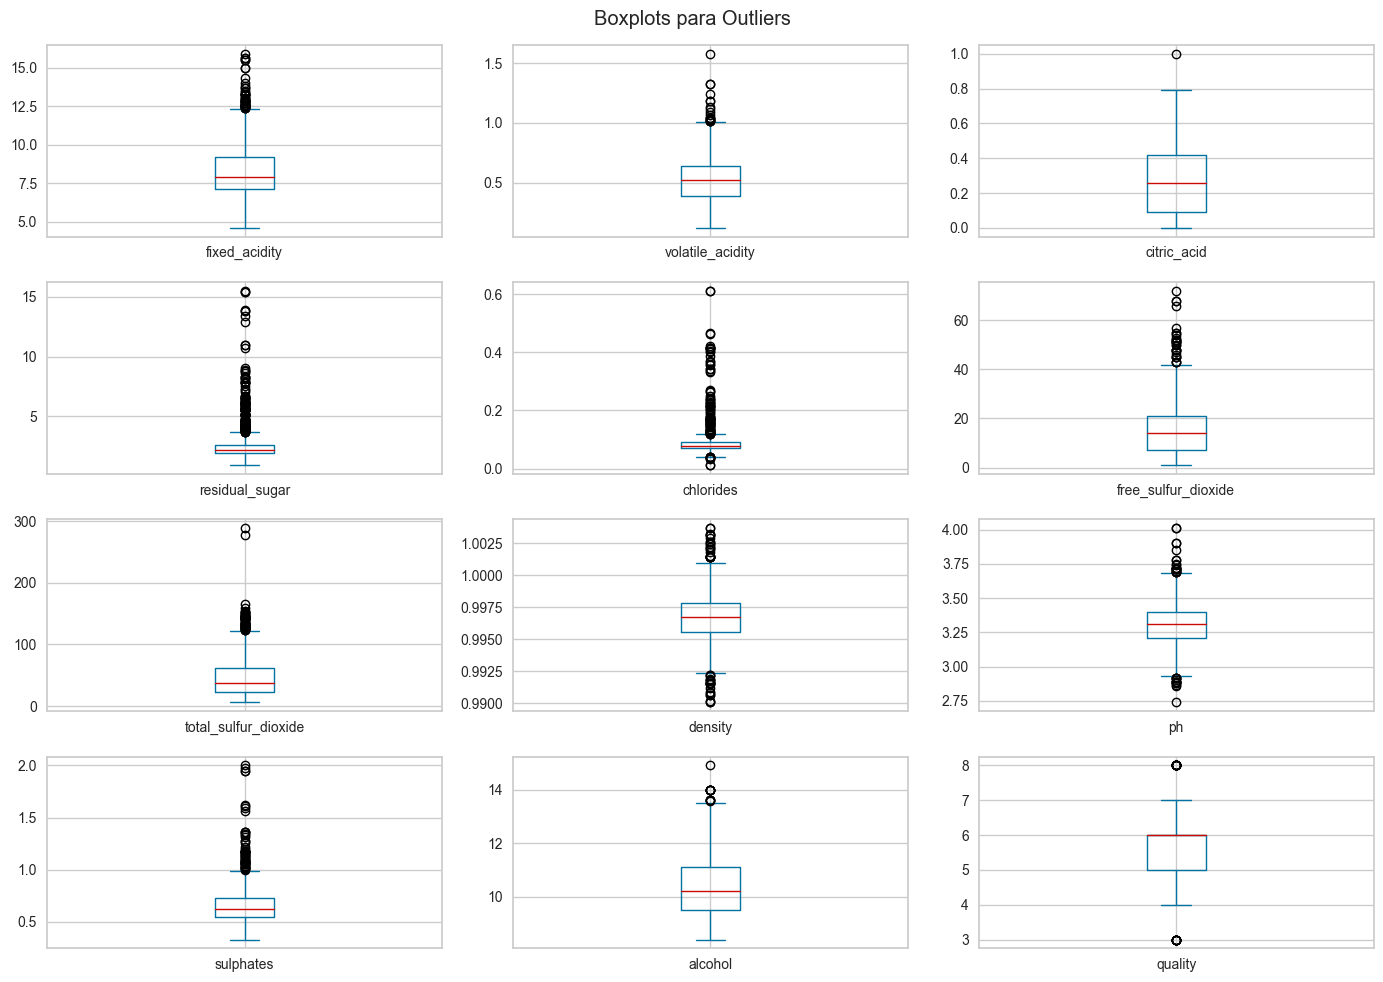

In [27]:
# Visualização de Boxplots para detecção de outliers (requisito de EDA)
df.drop(columns=['vinho_bom']).plot(kind='box', subplots=True, layout=(4, 3), figsize=(14, 10), title='Boxplots para Outliers')
plt.tight_layout()
plt.show()

In [28]:
X = df.drop(['quality', 'vinho_bom'], axis=1)
y = df['vinho_bom']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dados divididos: treino={len(X_treino)} amostras, teste={len(X_teste)} amostras.")

Dados divididos: treino=1119 amostras, teste=480 amostras.


### Implementando GaussianNB(Naive Bayes) e Regressão logística

In [29]:
#Seção da regresão logística 
regressao_logica = LogisticRegression(random_state=42, max_iter=1000)
regressao_logica.fit(X_treino, y_treino)
predicao_reg_log_y = regressao_logica.predict(X_teste)
probabilidade_reg_log_y = regressao_logica.predict_proba(X_teste)[:, 1]

#Naive bayes
nb = GaussianNB()
nb.fit(X_treino, y_treino)
predicao_nb_y = nb.predict(X_teste)
probabilidade_nb_y = nb.predict_proba(X_teste)[:, 1]

print('modelos treinados com sucesso')

modelos treinados com sucesso


In [30]:
def avaliar_modelo(y_true, y_pred,y_proba,nome_modelo):
    acuracia = accuracy_score(y_true=y_true, y_pred=y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    matriz = confusion_matrix(y_true, y_pred)

    print(f"Resultados do modelo: {nome_modelo} ")
    print(f"Accuracy (Acurácia): {acuracia:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("\nMatriz de Confusão:")

    #print da matriz final p/ melhor visualização
    print(matriz)

    return acuracia,recall,f1,auc_roc

metricas_regressao_logistica = avaliar_modelo(y_teste, predicao_reg_log_y,probabilidade_reg_log_y, "Regressão Logística")
metricas_naives_bayes = avaliar_modelo(y_teste, predicao_nb_y, probabilidade_nb_y, "Naive bayes")

Resultados do modelo: Regressão Logística 
Accuracy (Acurácia): 0.8833
Recall: 0.2923
F1 Score: 0.4043
AUC-ROC: 0.8688

Matriz de Confusão:
[[405  10]
 [ 46  19]]
Resultados do modelo: Naive bayes 
Accuracy (Acurácia): 0.8438
Recall: 0.6769
F1 Score: 0.5399
AUC-ROC: 0.8472

Matriz de Confusão:
[[361  54]
 [ 21  44]]


### Conclusão

A regressão logística é de fato a que tem a maior acurácia. Entretanto, falha ao tentar identificar a maioria de boa qualidade (baixo recall). O Naive Bayes então, possui acurácia menor, mas tem alto recall, sendo melhor em encontrar vinhos bons

## OTIMIZAÇÃO

In [31]:
#Definindo espaço de busca do naive bayes

param_grid = {
    'var_smoothing': np.logspace(0,-9, num = 10)
}

nb_model = GaussianNB()

In [32]:
#Otimizando a precisão e o recall com cv = 5
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=1
)

print('Otimizando Naive bayes...')
grid_search.fit(X_treino, y_treino)

melhor_nb_modelo = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

Otimizando Naive bayes...
Melhores hiperparâmetros: {'var_smoothing': 1e-09}


In [33]:
#Avaliação final do modelo otimizado 
y_pred_otimizada = melhor_nb_modelo.predict(X_teste)
y_proba_otimizada = melhor_nb_modelo.predict_proba(X_teste)[:, 1]

#Reutilizando a função avaliar modelo.
metricas_nb_otimizado = avaliar_modelo(y_teste, y_pred_otimizada, y_proba_otimizada, "Naive Bayes otimizado")

Resultados do modelo: Naive Bayes otimizado 
Accuracy (Acurácia): 0.8438
Recall: 0.6769
F1 Score: 0.5399
AUC-ROC: 0.8472

Matriz de Confusão:
[[361  54]
 [ 21  44]]
